In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2 (a)(b)

In [2]:
def power_method(A, x_0, max_iter=49):
    '''
    Input: Symmetric matrix A, initial vector x_0
    Output: Eigenvalue with greates abs value
    '''
    assert np.allclose(A, A.T)
    assert len(x_0) == A.shape[1]
    
    history = []


    for i in range(max_iter):
        x_0 = A @ x_0
        x_0 = x_0 * (1/np.linalg.norm(x_0))
        history.append(x_0)
    
    vec = history[-1]
    val = float((vec.T @ A @ vec) / (vec.T @ vec))
    
    for i in range(5):
        print(f"The # {i+1} iteration x_0 = {history[i].T}^T")

    
    return vec, val


In [3]:
A = np.array([
    [-2, 1, 4],
    [1, 1, 1],
    [4, 1, -2]
])

In [4]:
x_0 = np.array([1, 2, -1]).reshape(-1, 1)
vec, val = power_method(A, x_0)

print("Eigenvactor: ", vec.T )
print("Eigenvalue: ", val)

The # 1 iteration x_0 = [[-0.43643578  0.21821789  0.87287156]]^T
The # 2 iteration x_0 = [[ 0.80829038  0.11547005 -0.57735027]]^T
The # 3 iteration x_0 = [[-0.64483142  0.05862104  0.7620735 ]]^T
The # 4 iteration x_0 = [[ 0.73561236  0.02942449 -0.67676337]]^T
The # 5 iteration x_0 = [[-0.69215012  0.0147266   0.72160331]]^T
Eigenvactor:  [[-7.07106781e-01  8.51170986e-16  7.07106781e-01]]
Eigenvalue:  -6.0


In [5]:
x_0 = np.array([1, 2, 1]).reshape(-1, 1)
vec, val = power_method(A, x_0)

print("Eigenvactor: ", vec.T )
print("Eigenvalue: ", val)

The # 1 iteration x_0 = [[0.57735027 0.57735027 0.57735027]]^T
The # 2 iteration x_0 = [[0.57735027 0.57735027 0.57735027]]^T
The # 3 iteration x_0 = [[0.57735027 0.57735027 0.57735027]]^T
The # 4 iteration x_0 = [[0.57735027 0.57735027 0.57735027]]^T
The # 5 iteration x_0 = [[0.57735027 0.57735027 0.57735027]]^T
Eigenvactor:  [[0.57735027 0.57735027 0.57735027]]
Eigenvalue:  3.0


In [6]:
# Use the built-in function to compute eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(A)
print("Eigenvalues: ", vals)
print("Eigenvectors: \n", vecs)

Eigenvalues:  [-6.00000000e+00  3.00000000e+00  2.77080206e-16]
Eigenvectors: 
 [[ 7.07106781e-01 -5.77350269e-01  4.08248290e-01]
 [-4.70543743e-17 -5.77350269e-01 -8.16496581e-01]
 [-7.07106781e-01 -5.77350269e-01  4.08248290e-01]]


* For $x_0 = (1, 2, -1)^{T}$, the sequences converge to the eigenvector corresponding to the eigenvalue of $\lambda = -6$.(Since the eigenvalue is negative, the eigenvector is oscillating between signs)
* For $x_0 = (1, 2, 1)^{T}$, the sequences converge to the eigenvector corresponding to the eigenvalue of $\lambda = 3$.
* The limits don't agree. Generally speaking, if everything works correctly, the sequence should converge to the eigenvector with the greatest eigenvalue (absolute value sense). It includes the setup that $x_0$ is not orthogonal the eigenvector. However, $x_0 = (1, 2, -1)^{T}$ happens to be orthogonal to the eigenvactor corresponding to $\lambda = 6$, which is $(1, 0, 1)^{T}$

## 2 (c)(d)

In [7]:
def inverse_method(A, x_0, theta, max_iter=50):
    assert np.allclose(A, A.T)
    assert len(x_0) == A.shape[0]

    # we use "object" to denote the A - \theta Id
    object = A - theta * np.identity(A.shape[0])
    history = []

    for i in range(max_iter):
        x_0 = np.linalg.solve(object, x_0)
        x_0 = x_0 / np.linalg.norm(x_0)
        history.append(x_0)
    
    vec = history[-1]
    val = float((vec.T @ A @ vec) / (vec.T @ vec))
    
    for i in range(5):
        print(f"The # {i+1} iteration x_0 = {history[i].T}^T")

    
    return vec, val
    

In [8]:
A = np.array([
    [-2, 1, 4],
    [1, 1, 1],
    [4, 1, -2]
])


# Here we pick \theta = {-0.1, 2.5, -7}
theta_space = [-0.1, 2.5, -7]

# x_0 = [5, 7, 11]^{T}
# x_0 is not orthogonal to any eigenvector
x_0 = np.array([5, 7, 11]).reshape(-1, 1) 

for i, theta in enumerate(theta_space):
    print(f"#{i+1} REPORT (first 5)")
    vecs, vals = inverse_method(A, x_0, theta)
    print(f"#{i+1} Eigenvalues: ", vals)
    print(f"#{i+1} Eigenvectors: \n", vecs)
    print()

#1 REPORT (first 5)
The # 1 iteration x_0 = [[ 0.68281363 -0.45343555  0.57285404]]^T
The # 2 iteration x_0 = [[ 0.41690339 -0.80660941  0.41901411]]^T
The # 3 iteration x_0 = [[ 0.40858131 -0.81618127  0.40854553]]^T
The # 4 iteration x_0 = [[ 0.40825815 -0.81648641  0.40825876]]^T
The # 5 iteration x_0 = [[ 0.40824862 -0.81649625  0.40824861]]^T
#1 Eigenvalues:  0.0
#1 Eigenvectors: 
 [[ 0.40824829]
 [-0.81649658]
 [ 0.40824829]]

#2 REPORT (first 5)
The # 1 iteration x_0 = [[0.58547157 0.58724305 0.55889949]]^T
The # 2 iteration x_0 = [[0.57757053 0.57534    0.57913398]]^T
The # 3 iteration x_0 = [[0.57719536 0.57775183 0.5771034 ]]^T
The # 4 iteration x_0 = [[0.57738772 0.57726994 0.57739313]]^T
The # 5 iteration x_0 = [[0.5773424  0.57736633 0.57734208]]^T
#2 Eigenvalues:  3.0
#2 Eigenvectors: 
 [[0.57735027]
 [0.57735027]
 [0.57735027]]

#3 REPORT (first 5)
The # 1 iteration x_0 = [[-0.49148906  0.1509803   0.8576966 ]]^T
The # 2 iteration x_0 = [[-0.6870911   0.01485628  0.72641

* The sequence always converges to the eigenvector corresponding to eigenvalue $\lambda$. E.g. if $\theta=0.1$, it converges to the eigenvector with eigenvalue $0$ since $0$ is closest to $\theta=0.1$

* It consistent with the nature of inverse power method, since it converges to the eigenvector whose eigenvalue closet to $\theta$, which, in this case, is $\lambda = 0$. If we dig deeper, the nature of this property of inverse method is guaranteed by the essence of power method. Since the biggest eigenvalue for $(A - \theta I)^{-1}$ is produced by the eigenvalue which is closed to $\theta$.

## 4(b)

In [9]:
def tridiaglize(A):
    assert np.allclose(A, A.T)
    n = A.shape[0]

    for i in range(n-2):
        x = A[i+1:, i]
        e = np.zeros(x.shape)
        e[0] = 1

        v = (x + np.linalg.norm(x) * e).reshape(-1, 1)
        print("v:", v)
        h = np.identity(x.shape[0])  - (2 / (v.T @ v) ) * (v @ v.T)
        # Augment the householder into the full-size matrix
        H = np.identity(n)

        H[-h.shape[0]:, -h.shape[0]:] = h
        
        print("H: \n ",H)
        
        A = H @ A @ H
        print(H)
        print(A)
        
        
    
    return A



In [10]:
def qr_algo(A):
    '''
    Input: A tridiagonal matrix
    Output: A diagonal matrix
    '''

    # convertit to the tridiagonal form

    A = tridiaglize(A)

    flag = True
    iters = 0
    
    while flag:
        Q, R = np.linalg.qr(A)
        A = R @ Q

        diag_mat = np.diag(A.diagonal())
        # Here we add a tolerance for stopping criterion
        if np.allclose(diag_mat, A):
            flag = False
        
        iters += 1
        
    
    return A


## 4(c)

In [11]:
def qr_algo_tol(A, gt, tol=1e-10, ):
    '''
    Input: A tridiagonal matrix
    Output: A diagonal matrix
    '''

    # convertit to the tridiagonal form

    A = tridiaglize(A)

    flag = True
    iters = 0
    
    while flag:
        Q, R = np.linalg.qr(A)
        A = R @ Q

        vals = np.sort(A.diagonal())

        if np.allclose(vals, gt, atol=tol):
            flag = False
        
        iters += 1 
    
    return A, iters


## 4(d)

In [12]:
r_space = np.linspace(0.1, 0.9, 20)
iter_hist = []
for r in r_space:
    A = np.array([
        [1, r],
        [r, 1]
    ])

    gt = np.array([1-r, 1+r])

    vals, iters = qr_algo_tol(A, gt)
    
    iter_hist.append(iters)



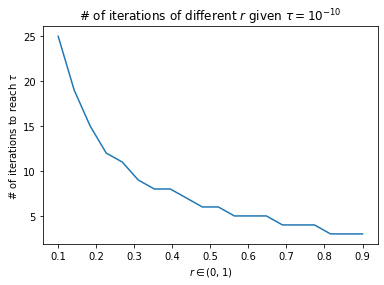

In [13]:
plt.plot(r_space, iter_hist)
plt.xlabel(r"$r\in (0, 1)$")
plt.ylabel(r"# of iterations to reach $\tau$")
plt.title(r"# of iterations of different $r$ given $\tau = 10^{-10}$")
plt.show()

* When $r$ become larger, the ratio between two eigenvalues, $\frac{1}{r}$, become smaller.
* In that case, the numbers of iterations needed to converger for QR-algorithm declines with the decline of ratio.

## 5(a)

In [14]:
# set up a size of my toy internet
n = 500
I = np.identity(500)
A = 0.5 * I[np.random.permutation(n),:] + (np.maximum(2, np.random.normal(size=(n, n))) - 2)
A = A - np.diag(A.diagonal())
L = A @ np.diag(1./ np.maximum(1e-10, np.sum(A, 1)))

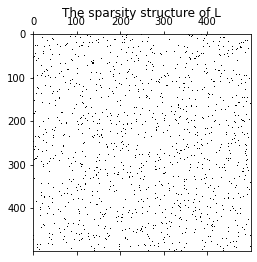

In [15]:
plt.spy(L)
plt.title("The sparsity structure of L")
plt.show()

## 5(b)

In [16]:
vals = np.linalg.eigvals(L)

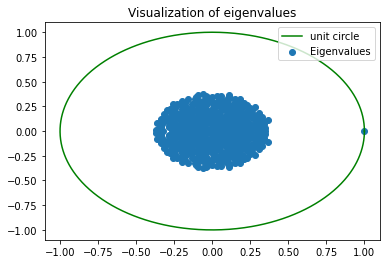

In [17]:
plt.scatter(vals.real, vals.imag, label="Eigenvalues")

theta = np.linspace(0, 2*np.pi, 1000)

plt.plot(np.cos(theta), np.sin(theta), label="unit circle", c="g")
plt.title("Visualization of eigenvalues")
plt.legend()

## 5(c)

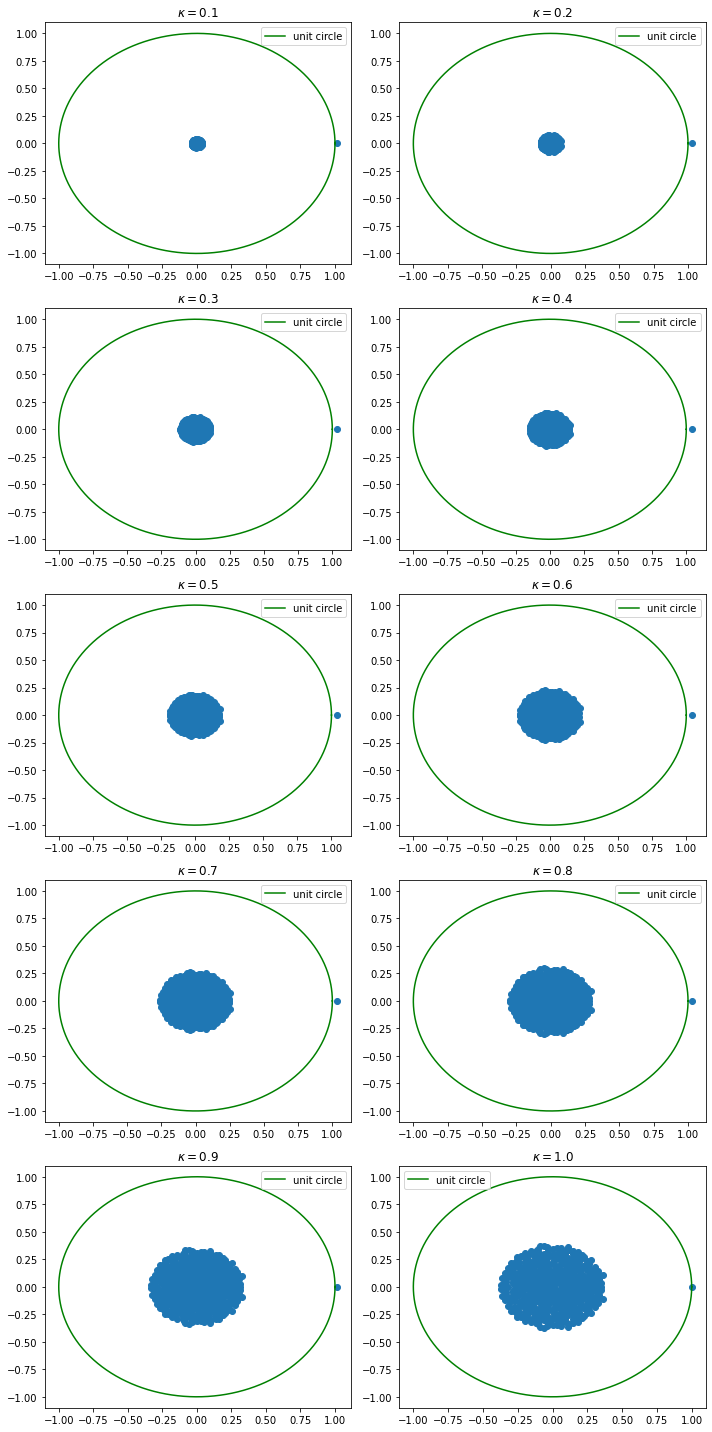

In [18]:
kappa_space = np.linspace(0.1, 1.0, 10)

E = np.array([1/n]* n**2).reshape(n, n)

fig, axs = plt.subplots(5, 2)


fig.set_size_inches(10, 20)


for i in range(10):
    kappa = kappa_space[i]
    S = kappa * L + (1 - kappa) * E 
    S_vals = np.linalg.eigvals(S)
    axs[i//2][i%2].scatter(S_vals.real, S_vals.imag)
    axs[i//2][i%2].plot(np.cos(theta), np.sin(theta), label="unit circle", c="g")
    axs[i//2][i%2].set_title(r"$\kappa = {:.1f}$".format(kappa_space[i]))
    axs[i//2][i%2].legend()


fig.tight_layout()


* As we can see, by adding a $\kappa < 1$, the eigenvalues other than $\lambda = 1$(which we want) are more condensed to the origin. Therefore, when we are applying power method, it the ratio between the largest eigenvalue and second large eigenvalue is getting bigger, which will help the power method.